<a href="https://colab.research.google.com/github/PietroDF/Standard_Machine_Learning/blob/master/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter sentiment analysis

Inspiring notebook @ https://github.com/dD2405/Twitter_Sentiment_Analysis/blob/master/Twitter_Sentiment_Analysis.ipynb

# Libraries

In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

## Download

In [0]:
# Read the train and test dataset
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

In [0]:
train.shape

(31962, 3)

In [0]:
train_original = train.copy()
test_original = test.copy()

In [0]:
train_original.shape

(31962, 3)

In [0]:
train_original.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [0]:
combine = train.append(test,ignore_index=True,sort=True)

## Remove @user

In [0]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [0]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

In [0]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Remove special characters

In [0]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [0]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [0]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [0]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Tokenization 
Each word as an item:
"the pen is on the table" -> ["the", "pen", "is", ...]

In [0]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

In [0]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

## Stemming 
Remove endings, keep roots:
Politician, politics -> politic


NOTA:

**Stemming** and **Lemmatization** both generate the root form of the inflected words. 

The difference is that stem might not be an actual word whereas, lemma is an actual language word

In [0]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

In [0]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [0]:
tokenized_tweet.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: Tidy_Tweets, dtype: object

In [0]:
combine['Tidy_Tweets'] = tokenized_tweet

In [0]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis (EDA)

## Hashtag analysis

In [0]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [0]:
ht_positive = Hashtags_Extract(combine[combine['label']==0]['Tidy_Tweets'])

In [0]:
ht_negative = Hashtags_Extract(combine[combine['label']==1]['Tidy_Tweets'])

In [0]:
print('Positive\n',ht_positive[:10],'\nNegative\n', ht_negative[:10])

Positive
 [['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv'], ['allshowandnogo'], [], ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'], ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'], []] 
Negative
 [['cnn', 'michigan', 'tcot'], ['australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin'], [], [], ['neverump', 'xenophobia'], ['love', 'peac'], [], ['race', 'ident', 'med'], ['altright', 'whitesupremaci'], ['linguist', 'race', 'power', 'raciolinguist']]


In [0]:
ht_positive_unnest = sum(ht_positive,[])
ht_negative_unnest = sum(ht_negative,[])

In [0]:
print('Positive\n',ht_positive_unnest[:10],'\nNegative\n', ht_negative_unnest[:10])

Positive
 ['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate'] 
Negative
 ['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin', 'neverump']


In [0]:
# Words distributions
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [0]:
print(word_freq_positive)

<FreqDist with 19495 samples and 68425 outcomes>


In [0]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [0]:
print(df_positive.head(),'\n'*3 , df_negative.head())

    Hashtags  Count
0        run     72
1       lyft      2
2  disapoint      1
3   getthank      2
4      model    375 


        Hashtags  Count
0           cnn     10
1      michigan      2
2          tcot     14
3     australia      6
4  opkillingbay      5


In [0]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
df_negative_plot = df_negative.nlargest(20,columns='Count')

In [0]:
# sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
# sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
# sns.despine()

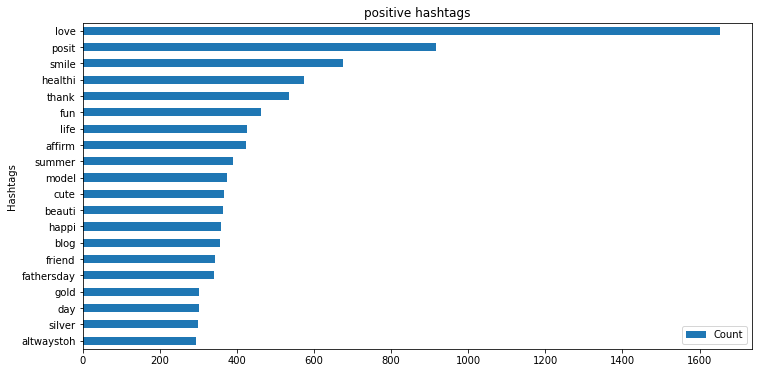

In [0]:
ax = df_positive_plot.sort_values('Count').plot.barh(x='Hashtags', y='Count', figsize=(12,6), title='positive hashtags')

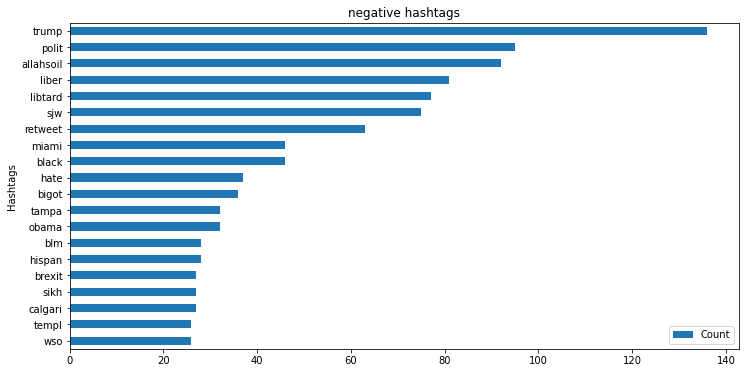

In [0]:
ax = df_negative_plot.sort_values('Count').plot.barh(x='Hashtags', y='Count', figsize=(12,6), title='negative hashtags')

# Data preparation

## Tf-Idf features

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# max_df = 0.7 # Removes terms with DF higher than the 70% of the documents
# min_df = 5 # Terms must have DF >= 5 to be considered

tfidf=TfidfVectorizer(max_df=0.5, min_df=0, max_features=1000, stop_words='english')
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

In [0]:
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

In [0]:
df_tfidf.shape, df_tfidf.head()

((49159, 1000),
    0    1    2    3    4    5    6    ...  993  994  995  996  997  998  999
 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 
 [5 rows x 1000 columns])

In [0]:
zero_rows = df_tfidf.sum(axis=1)

In [0]:
zero_rows.head()

0    1.716102
1    1.691925
2    1.000000
3    1.701505
4    1.000000
dtype: float64

In [0]:
# delete rows with all zeros
df_tfidf = df_tfidf[zero_rows>0]

In [0]:
df_tfidf.shape

(47634, 1000)

In [0]:
unbalanced_class = train.groupby(['label']).count()['id'].values

In [0]:
unbalanced_weigth = np.max(unbalanced_class)/unbalanced_class

In [0]:
weight_dict = {}
for idx,val in enumerate(unbalanced_weigth):
  weight_dict[idx] = val*1**idx

In [0]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Modeling

## Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix, train['label'], test_size=0.3, random_state=17)

## Model Selection

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
Log_Reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter = 1000, class_weight=weight_dict)

In [0]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 13.256021409455842},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=1000, multi_class='auto',
                   n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

## Evaluation

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, confusion_matrix

### Train

In [0]:
y_train_prediction_prob = Log_Reg.predict_proba(x_train_tfidf)

In [0]:
y_train_prediction_prob

array([[0.79563685, 0.20436315],
       [0.98410805, 0.01589195],
       [0.44362697, 0.55637303],
       ...,
       [0.97567964, 0.02432036],
       [0.75350157, 0.24649843],
       [0.9558682 , 0.0441318 ]])

In [0]:
y_train_prediction_prob.shape, y_train_tfidf.shape

((22373, 2), (22373,))

In [0]:
y_train_prediction = Log_Reg.predict(x_train_tfidf)

In [0]:
confusion_matrix(y_train_tfidf, y_train_prediction, labels=None, sample_weight=None, normalize=None)

array([[18305,  2474],
       [  177,  1417]])

In [0]:
f1_train = f1_score(y_train_tfidf, y_train_prediction, pos_label=1)

In [0]:
f1_train

0.5166818596171378

In [0]:
pos_label_idx = 1
fpr, tpr, thresholds = roc_curve(y_train_tfidf, y_train_prediction_prob[:,pos_label_idx], pos_label=pos_label_idx, drop_intermediate = True)

In [0]:
def calculate_optimal_threshold(x_val,y_val,thresholds):

  min_dist = 100
  for x,y,t in zip(x_val,y_val,thresholds):

      square_dist = (0-x)**2+(1-y)**2

      if square_dist<min_dist:

        min_dist = square_dist
        best_x = x
        best_y = y
        best_t = t

  return (best_x, best_y, best_t)

In [0]:
best_fpr, best_tpr, best_threshold = calculate_optimal_threshold(fpr, tpr, thresholds)
best_fpr, best_tpr, best_threshold

(0.12055440589056259, 0.8927227101631117, 0.494538422015773)

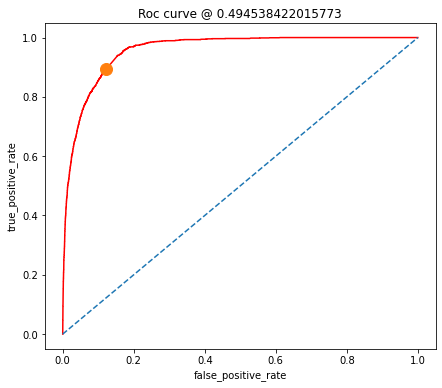

In [0]:
plt.figure(figsize=(7,6))
plt.plot(fpr,tpr,'-r', [0,1],[0,1],'--', best_fpr, best_tpr,'o', markersize=12)
plt.title('Roc curve @ '+str(best_threshold))
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.show()

In [0]:
if pos_label_idx == 0:
  y_train_prediction = y_train_prediction_prob[:,pos_label_idx]<best_threshold
elif pos_label_idx == 1:
  y_train_prediction = y_train_prediction_prob[:,pos_label_idx]>best_threshold
else:
  print('check pos_label_idx')

In [0]:
# Improvemenets with selected best threshold
confusion_matrix(y_train_tfidf, y_train_prediction, labels=None, sample_weight=None, normalize=None)

array([[18274,  2505],
       [  171,  1423]])

**Nota bene**: le due curve ottenute cambiando *pos_label_idx* sono perfettamente speculari e cambiando la label e, ricalcolando il valore della soglia, alla matrice di confusione non cambia assolutamente nulla.

### Validation

In [0]:
y_valid_prediction = Log_Reg.predict_proba(x_valid_tfidf)

In [0]:
y_valid_prediction

array([[0.92313681, 0.07686319],
       [0.95172395, 0.04827605],
       [0.56145761, 0.43854239],
       ...,
       [0.96833014, 0.03166986],
       [0.81779782, 0.18220218],
       [0.99151575, 0.00848425]])

In [0]:
y_valid_prediction = y_valid_prediction[:,1]>=0.5

y_valid_prediction = y_valid_prediction.astype(np.int)
y_valid_prediction

# calculating f1 score
f1_valid = f1_score(y_valid_tfidf, y_valid_prediction)

f1_valid

0.4365957446808511

In [0]:
roc_auc_score(y_valid_tfidf, prediction_int, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

0.8255397868882565

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = True)

In [0]:
confusion_matrix(y_valid_tfidf, prediction_int, labels=None, sample_weight=None, normalize=None)

array([[7753, 1188],
       [ 140,  508]])

In [0]:
test_tfidf = tfidf_matrix[31962:]

In [0]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

In [0]:
submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

res = pd.read_csv('result.csv')